In [119]:
library(pastecs)
library(ggplot2)
library(ggpubr)
library(Hmisc)
library(ggpubr)
library(corrplot)
library(plyr)
library(multcomp)
library(afex)
library(tidyr)
library(ggsignif)
library(ltm)
# library(tidyverse)
library(rms)
library(wesanderson) # color package
library(psych) #EFA
library(lavaan)
library(semPlot)
library(semTools)
library(dplyr)
library(knitr)
library(MVN)
library(lavaanPlot)
library ( semTable )
# library(corrgram)
# library(tidyverse)
library(ggpubr)
library(rstatix)
library(broom)
library(multcomp)

par(bg = "#f7f7f7")

- read all data

In [67]:
all_data = read.csv('./csv/all_data.csv')
all_unique = read.csv('./csv/all_unique.csv')
names(all_unique)

[1] "id"               "age"              "country"          "education"       
 [5] "gender"           "FK_9"             "FK_10"            "FK_11"           
 [9] "FK_12"            "CS_9"             "CS_10"            "CS_11"           
[13] "CS_12"            "CS_13"            "CS_14"            "SFD"             
[17] "CC"               "sfd_level"        "cc_level"         "recipes"         
[21] "appearance"       "taste"            "healthiness"      "familiarity"     
[25] "user_avg_ratings" "Height"           "Weight"           "RecipeWebUsage"  
[29] "HomeCook"         "CookingExp"       "EatingGoals"      "Depression"      
[33] "PhysicalActivity" "SleepHours"       "CookingTime"

In [68]:
all_unique

id,age,country,education,gender,FK_9,FK_10,FK_11,FK_12,CS_9,⋯,Height,Weight,RecipeWebUsage,HomeCook,CookingExp,EatingGoals,Depression,PhysicalActivity,SleepHours,CookingTime
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
14,b18_24,PL,High_school,Male,3,4,4,2,4,⋯,183,69,2,2,3,3,2,1,1,1
16,b25_35,GB,MSc,Female,4,5,5,1,4,⋯,170,51,1,3,3,2,1,2,2,1
17,b35_45,ES,BA,Female,5,5,4,1,5,⋯,167,58,2,3,4,2,2,1,2,2
18,b35_45,ES,BA,Male,4,4,4,2,4,⋯,175,100,1,3,4,2,3,3,2,2
19,b45_55,ZA,BA,Female,5,5,5,1,5,⋯,169,74,2,3,5,2,1,2,1,2
20,b25_35,DE,BA,Female,4,3,3,2,4,⋯,167,55,1,2,3,2,2,3,2,2
21,b25_35,GB,High_school,Male,3,3,2,4,1,⋯,182,114,1,2,2,2,1,1,1,2
25,b25_35,ZA,BA,Male,3,3,2,4,4,⋯,170,63,1,1,2,3,2,1,2,2
26,b18_24,ZA,BA,Female,4,5,4,2,3,⋯,178,56,3,3,3,1,1,1,3,2


## Correlations analysis

In [87]:
## food knowledge and ratings
ratings_profiles =all_unique[,c('sfd_level','cc_level','appearance','taste','healthiness','familiarity','user_avg_ratings','Height','Weight','RecipeWebUsage','HomeCook','CookingExp','EatingGoals','Depression','PhysicalActivity','SleepHours','CookingTime')]


In [97]:
cor <- round(cor(ratings_profiles), 2)
cor

,sfd_level,cc_level,appearance,taste,healthiness,familiarity,user_avg_ratings,Height,Weight,RecipeWebUsage,HomeCook,CookingExp,EatingGoals,Depression,PhysicalActivity,SleepHours,CookingTime
sfd_level,1.00,0.17,0.06,0.05,0.23,-0.02,0.05,0.00,0.08,0.25,0.12,0.29,-0.02,-0.19,0.01,0.00,-0.05
cc_level,0.17,1.00,0.02,-0.10,0.17,-0.19,0.23,0.01,0.07,0.20,0.40,0.49,0.01,-0.10,-0.04,-0.02,0.40
appearance,0.06,0.02,1.00,-0.05,0.01,-0.10,0.12,0.00,-0.22,0.10,0.03,0.09,-0.02,-0.10,-0.07,-0.02,0.04
taste,0.05,-0.10,-0.05,1.00,0.09,0.31,0.02,0.02,-0.03,0.07,-0.10,-0.24,0.12,0.00,-0.10,-0.12,-0.16
healthiness,0.23,0.17,0.01,0.09,1.00,0.13,0.14,0.00,-0.04,0.16,0.14,0.14,0.10,-0.05,-0.16,-0.01,0.20
familiarity,-0.02,-0.19,-0.10,0.31,0.13,1.00,0.07,0.05,0.04,-0.10,-0.18,-0.23,-0.01,0.03,-0.05,-0.04,-0.05
user_avg_ratings,0.05,0.23,0.12,0.02,0.14,0.07,1.00,0.03,0.02,0.19,0.16,0.17,0.00,-0.08,-0.01,0.06,0.19
Height,0.00,0.01,0.00,0.02,0.00,0.05,0.03,1.00,0.23,0.05,-0.03,-0.04,-0.18,-0.10,-0.09,0.06,0.09
Weight,0.08,0.07,-0.22,-0.03,-0.04,0.04,0.02,0.23,1.00,0.10,-0.09,0.08,0.03,-0.05,0.07,0.06,0.12
RecipeWebUsage,0.25,0.20,0.10,0.07,0.16,-0.10,0.19,0.05,0.10,1.00,0.24,0.34,0.09,-0.07,-0.17,0.16,0.25


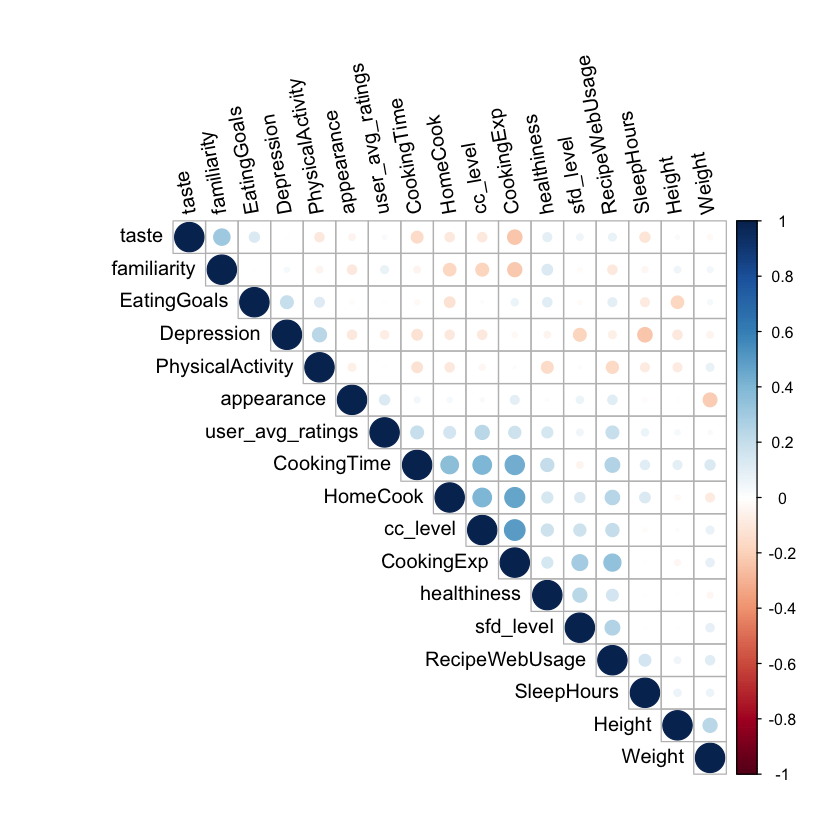

In [143]:
library(corrplot)
corrplot(cor, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 100)

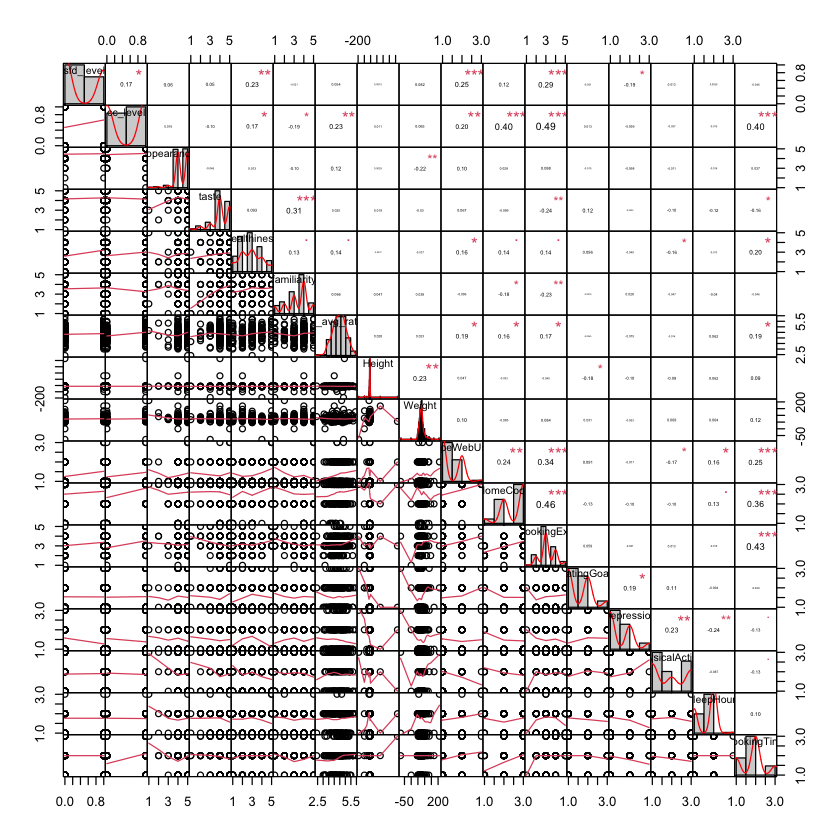

In [98]:
library("PerformanceAnalytics")
chart.Correlation(ratings_profiles, histogram=TRUE, pch=19)
ggsave("./figures/corr.png",  width=10, height=10,dpi=700)

In [ ]:
## user choice factors and ratings
all_unique[,c('SFD','CC','sfd_level','cc_level','rating',
'appearance','taste','healthiness','familiarity','user_avg_ratings','Height','Weight',
'RecipeWebUsage','HomeCook','CookingExp','EatingGoals','Depression','PhysicalActivity','SleepHours',
'CookingTime')]

- User choice factors 

In [170]:
user_choice_factors = all_unique[,c('appearance','taste','healthiness','familiarity','user_avg_ratings')]

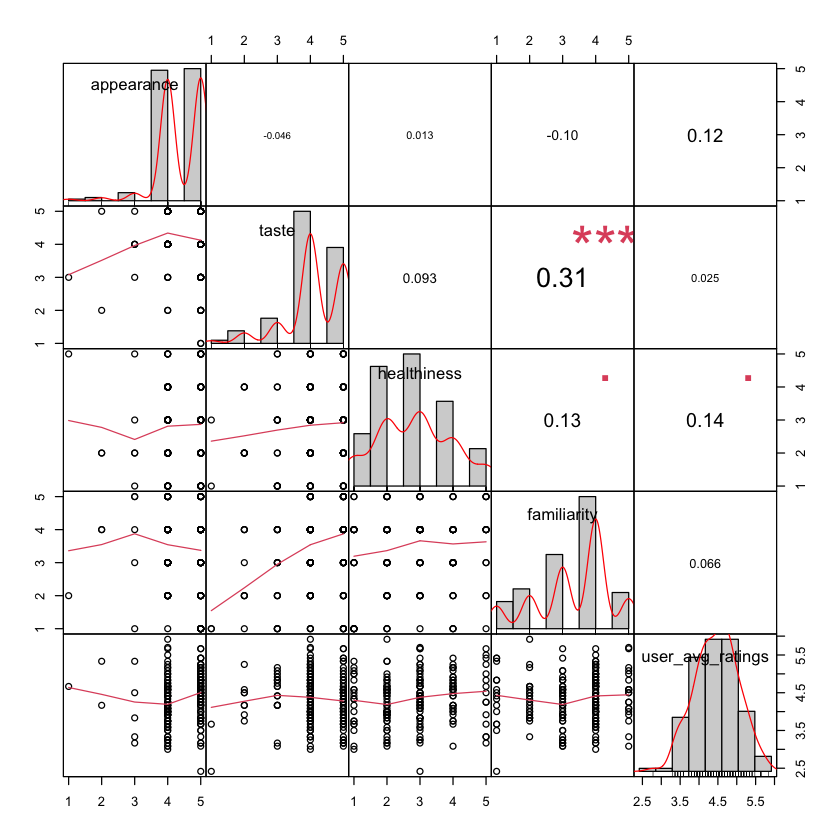

In [171]:
chart.Correlation(user_choice_factors, histogram=TRUE, pch=19)
ggsave("./Figures/user_choice_factors.pdf",  width=8, height=5,dpi=700)

In [201]:
userProfile <- 'user_avg_ratings ~ appearance + taste + healthiness + familiarity'
userP.fit <- lm(userProfile , data = user_choice_factors)
summary <- summary(userP.fit)
summary


Call:
lm(formula = userProfile, data = user_choice_factors)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92258 -0.38513  0.03378  0.41636  1.73610 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.4887319  0.4420947   7.891 3.84e-13 ***
appearance   0.1185244  0.0750126   1.580   0.1160    
taste       -0.0005169  0.0612039  -0.008   0.9933    
healthiness  0.0742532  0.0439039   1.691   0.0927 .  
familiarity  0.0356509  0.0470550   0.758   0.4497    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6474 on 166 degrees of freedom
Multiple R-squared:  0.0363,	Adjusted R-squared:  0.01307 
F-statistic: 1.563 on 4 and 166 DF,  p-value: 0.1865


## Demographics and ratings 

- age

In [99]:
Rating_age <- user_avg_ratings ~  age
Rating_age.fit <- lm(Rating_age , data = all_unique)
summary <- summary(Rating_age.fit)
summary


Call:
lm(formula = Rating_age, data = all_unique)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77083 -0.41364  0.01068  0.43034  1.72917 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.40598    0.10340  42.611   <2e-16 ***
ageb25_35   -0.21848    0.12971  -1.684    0.094 .  
ageb35_45    0.07642    0.14925   0.512    0.609    
ageb45_55    0.09865    0.18400   0.536    0.593    
agebover_55 -0.08932    0.22889  -0.390    0.697    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6457 on 166 degrees of freedom
Multiple R-squared:  0.0412,	Adjusted R-squared:  0.0181 
F-statistic: 1.783 on 4 and 166 DF,  p-value: 0.1345


- education

In [100]:
contrast  = c(-5,1,1,1,1,1)
all_unique$education = as.factor(all_unique$education)
contrasts(all_unique$education) = contrast
print(contrasts(all_unique$education))

                 [,1]          [,2]          [,3]          [,4]          [,5]
BA                 -5  6.938894e-17  8.326673e-17  9.714451e-17  1.110223e-16
Doctorate           1 -4.472136e-01 -4.472136e-01 -4.472136e-01 -4.472136e-01
High_school         1  8.618034e-01 -1.381966e-01 -1.381966e-01 -1.381966e-01
Less_high_school    1 -1.381966e-01  8.618034e-01 -1.381966e-01 -1.381966e-01
MSc                 1 -1.381966e-01 -1.381966e-01  8.618034e-01 -1.381966e-01
Not                 1 -1.381966e-01 -1.381966e-01 -1.381966e-01  8.618034e-01


In [101]:
Rating_education <- user_avg_ratings ~  education
Rating_education.fit <- lm(Rating_education , data = all_unique)
summary <- summary(Rating_education.fit)
summary


Call:
lm(formula = Rating_education, data = all_unique)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.97179 -0.40535  0.02821  0.43155  1.52821 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.35264    0.14653  29.704   <2e-16 ***
education1   0.00541    0.03192   0.170   0.8656    
education2   0.03805    0.19659   0.194   0.8468    
education3  -0.60041    0.58485  -1.027   0.3061    
education4  -0.11529    0.21193  -0.544   0.5872    
education5   0.73292    0.43356   1.690   0.0928 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6526 on 165 degrees of freedom
Multiple R-squared:  0.02672,	Adjusted R-squared:  -0.002777 
F-statistic: 0.9059 on 5 and 165 DF,  p-value: 0.4787


- gender 

In [166]:
unique_gender = read.csv('./unique_gender.csv')

In [167]:
contrast  = c(-1,1)
unique_gender$gender = as.factor(unique_gender$gender)
contrasts(unique_gender$gender) = contrast
print(contrasts(unique_gender$gender))

       [,1]
Female   -1
Male      1


In [169]:
Rating_gender <- user_avg_ratings ~  gender
Rating_gender.fit <- lm(Rating_gender , data = unique_gender)
summary <- summary(Rating_gender.fit)
summary


Call:
lm(formula = Rating_gender, data = unique_gender)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.88226 -0.46560  0.02513  0.45107  1.51585 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.34987    0.05201   83.63   <2e-16 ***
gender1     -0.05095    0.05201   -0.98    0.329    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6505 on 168 degrees of freedom
Multiple R-squared:  0.005678,	Adjusted R-squared:  -0.0002401 
F-statistic: 0.9594 on 1 and 168 DF,  p-value: 0.3287


- Food knowledge level

In [104]:
SFD <- user_avg_ratings ~  sfd_level
SFD.fit <- lm(SFD , data = all_unique)
summary <- summary(SFD.fit)
summary


Call:
lm(formula = SFD, data = all_unique)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89439 -0.39439  0.03405  0.44483  1.60561 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.31106    0.06494  66.386   <2e-16 ***
sfd_level    0.07156    0.10150   0.705    0.482    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6526 on 169 degrees of freedom
Multiple R-squared:  0.002933,	Adjusted R-squared:  -0.002967 
F-statistic: 0.4971 on 1 and 169 DF,  p-value: 0.4817


- Confirmatory factor analysis

In [124]:
all_unique$FK_12 =  6 - all_unique$FK_12

In [125]:
Food_K = all_unique[, c('FK_9','FK_10','FK_11','FK_12')]
cor_mat_cf = cor(Food_K)
fact_loading_cf = fa(r = cor_mat_cf, nfactors = 4)
fact_loading_cf

Factor Analysis using method =  minres
Call: fa(r = cor_mat_cf, nfactors = 4)
Standardized loadings (pattern matrix) based upon correlation matrix
       MR1   MR2   MR3 MR4   h2   u2 com
FK_9  0.70  0.20  0.01   0 0.54 0.46 1.2
FK_10 0.78 -0.19  0.08   0 0.69 0.31 1.1
FK_11 0.69  0.01  0.23   0 0.59 0.41 1.2
FK_12 0.95  0.02 -0.12   0 0.86 0.14 1.0

                       MR1  MR2  MR3  MR4
SS loadings           2.50 0.08 0.10 0.00
Proportion Var        0.63 0.02 0.03 0.00
Cumulative Var        0.63 0.65 0.67 0.67
Proportion Explained  0.93 0.03 0.04 0.00
Cumulative Proportion 0.93 0.96 1.00 1.00

 With factor correlations of 
     MR1   MR2   MR3 MR4
MR1 1.00  0.01  0.23   0
MR2 0.01  1.00 -0.24   0
MR3 0.23 -0.24  1.00   0
MR4 0.00  0.00  0.00   1

Mean item complexity =  1.1
Test of the hypothesis that 4 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  1.96
The degrees of freedom for the model are -4  and the objective funct

In [126]:
cronbach.alpha(Food_K)


Cronbach's alpha for the 'Food_K' data-set

Items: 4
Sample units: 171
alpha: 0.864


In [134]:
foodknowledge.fit <- cfa(foodknowledgeModel, data = all_unique, std.lv = TRUE, ordered = TRUE)
summary(foodknowledge.fit)

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
“lavaan WARNING:
    The variance-covariance matrix of the estimated parameters (vcov)
    does not appear to be positive definite! The smallest eigenvalue
    (= -1.272302e-24) is smaller than zero. This may be a symptom that
    the model is not identified.”


lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Food_Knowledge,=~,FK_9,0,0.77305241,0.03600997,21.467733,0.000000e+00
Food_Knowledge,=~,FK_10,0,0.86142475,0.03219887,26.753264,0.000000e+00
Food_Knowledge,=~,FK_11,0,0.78286474,0.03368060,23.243788,0.000000e+00
Food_Knowledge,=~,FK_12,0,0.97468034,0.02262468,43.080397,0.000000e+00
FK_9,|,t1,0,-2.26697402,0.26995076,-8.397731,0.000000e+00
FK_9,|,t2,0,-1.51942732,0.14960452,-10.156293,0.000000e+00
FK_9,|,t3,0,-0.25940647,0.09730937,-2.665791,7.680733e-03
FK_9,|,t4,0,1.43233915,0.14212415,10.078084,0.000000e+00
FK_10,|,t1,0,-2.52118884,0.35185771,-7.165365,7.758238e-13


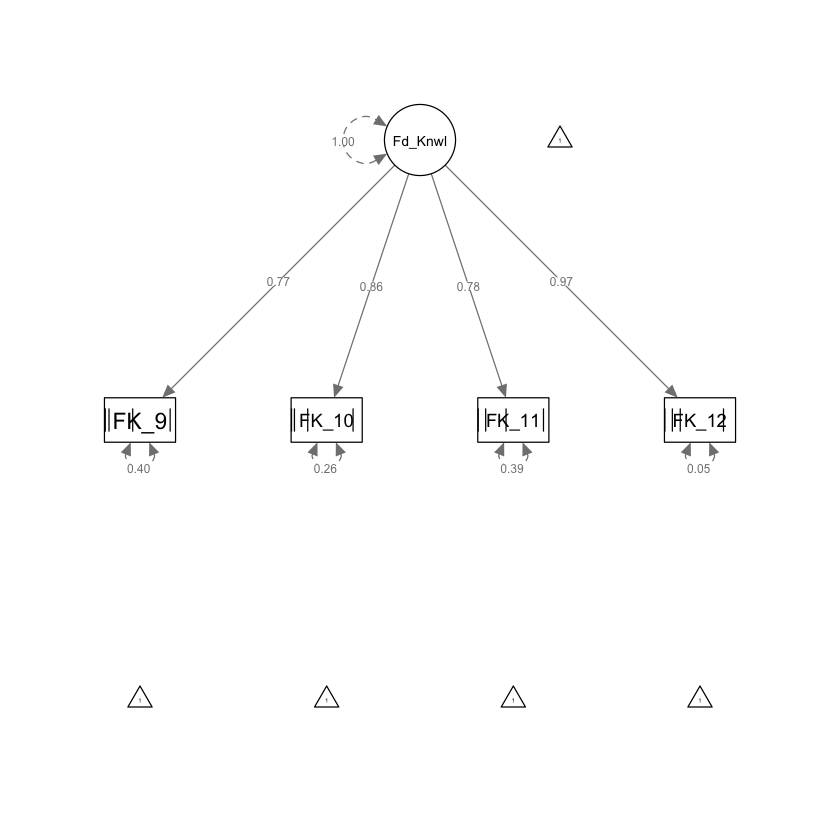

In [135]:
semPaths(foodknowledge.fit, "par", weighted = FALSE, nCharNodes = 7, shapeMan = "rectangle",
         sizeMan = 8, sizeMan2 = 5)

- Cooking experience

In [105]:
CC <- user_avg_ratings ~  cc_level
CC.fit <- lm(CC , data = all_unique)
summary <- summary(CC.fit)
summary


Call:
lm(formula = CC, data = all_unique)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06308 -0.42415  0.02025  0.43692  1.43692 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.17415    0.07194  58.019  < 2e-16 ***
cc_level     0.30560    0.09756   3.133  0.00204 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6354 on 169 degrees of freedom
Multiple R-squared:  0.05488,	Adjusted R-squared:  0.04929 
F-statistic: 9.813 on 1 and 169 DF,  p-value: 0.002043


In [ ]:
CC = all_unique[, c('CS_9','CS_10','CS_11','CS_12','CS_13','CS_14')]
cor_mat_cf = cor(CC)
CC_skills = fa(r = cor_mat_cf, nfactors = 4)
CC_skills

In [138]:
CC_knowledge <- 'CookingSkills =~ CS_9 + CS_10 + CS_11 + CS_12 + CS_13 + CS_14'
CC_knowledge.fit <- cfa(CC_knowledge, data = all_unique, std.lv = TRUE, ordered = TRUE)
summary(CC_knowledge.fit)

lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
CookingSkills,=~,CS_9,0,0.8253490,0.03439724,23.994632,0.000000e+00
CookingSkills,=~,CS_10,0,0.8153747,0.04356836,18.714835,0.000000e+00
CookingSkills,=~,CS_11,0,0.6233763,0.04324093,14.416349,0.000000e+00
CookingSkills,=~,CS_12,0,0.8725743,0.03610148,24.170046,0.000000e+00
CookingSkills,=~,CS_13,0,0.6639279,0.04750729,13.975284,0.000000e+00
CookingSkills,=~,CS_14,0,0.6298728,0.04992802,12.615617,0.000000e+00
CS_9,|,t1,0,-2.5211888,0.35185771,-7.165365,7.758238e-13
CS_9,|,t2,0,-1.8107766,0.18226095,-9.935077,0.000000e+00
CS_9,|,t3,0,-1.2206403,0.12726509,-9.591321,0.000000e+00


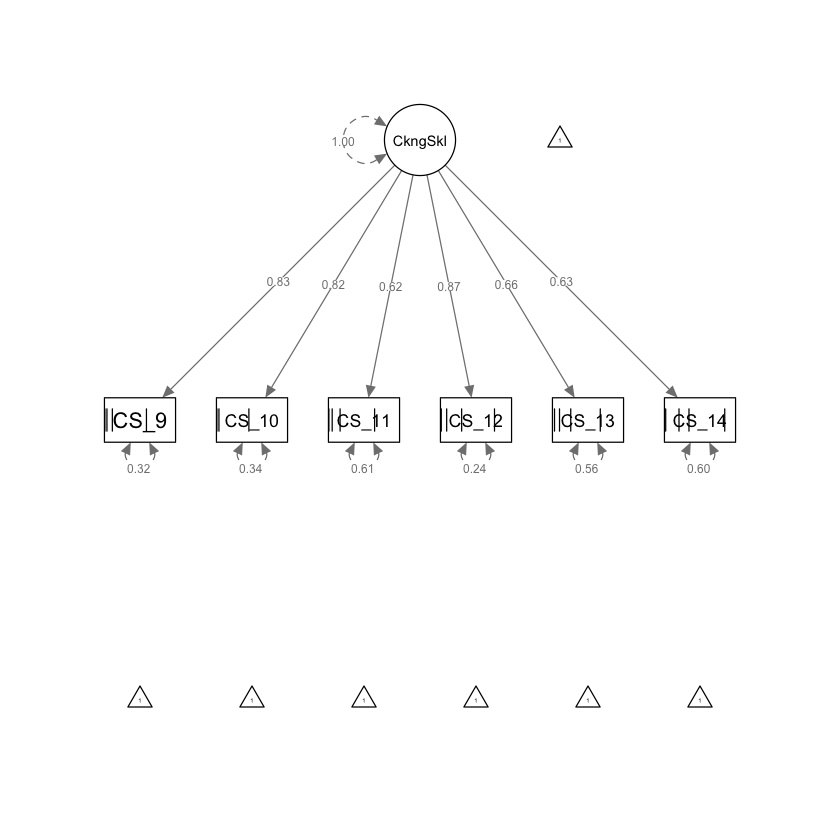

In [140]:
semPaths(CC_knowledge.fit, "par", weighted = FALSE, nCharNodes = 7, shapeMan = "rectangle",
         sizeMan = 8, sizeMan2 = 5)

##### USER PROFILE AND RATINGS 

In [174]:
user_profile = all_unique[,c('user_avg_ratings', 'Height','Weight',
'RecipeWebUsage','HomeCook','CookingExp','EatingGoals','Depression','PhysicalActivity','SleepHours',
'CookingTime')]


In [179]:
user_profile$BMI = all_unique$Weight/(all_unique$Height/100) **2

In [194]:
pdf(file = "./Figures/user_profile.pdf",   # The directory you want to save the file in
    width = 4, # The width of the plot in inches
    height = 4) # The height of the plot in inches


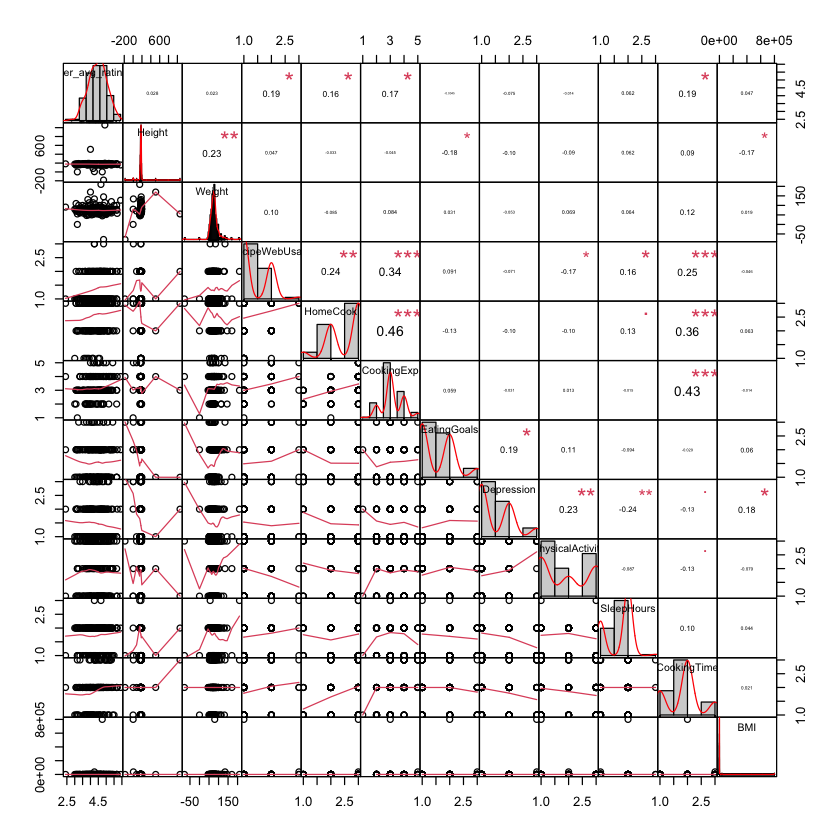

In [195]:
chart.Correlation(user_profile, histogram=TRUE, pch=19)
# ggsave("./Figures/user_profile.pdf",  width=8, height=5,dpi=700)

In [200]:
userProfile <- 'user_avg_ratings ~  RecipeWebUsage+HomeCook+CookingExp+EatingGoals+Depression+PhysicalActivity + SleepHours + CookingTime + BMI'
userP.fit <- lm(userProfile , data = user_profile)
summary <- summary(userP.fit)
summary


Call:
lm(formula = userProfile, data = user_profile)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86416 -0.42053  0.03158  0.39538  1.46425 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.710e+00  3.798e-01   9.769   <2e-16 ***
RecipeWebUsage    1.775e-01  1.052e-01   1.687   0.0936 .  
HomeCook          6.579e-02  9.474e-02   0.694   0.4884    
CookingExp        1.494e-02  8.109e-02   0.184   0.8540    
EatingGoals       9.017e-04  8.075e-02   0.011   0.9911    
Depression       -6.001e-02  8.299e-02  -0.723   0.4707    
PhysicalActivity  3.028e-02  5.999e-02   0.505   0.6144    
SleepHours       -5.875e-03  1.073e-01  -0.055   0.9564    
CookingTime       1.149e-01  9.099e-02   1.263   0.2085    
BMI               6.578e-07  8.362e-07   0.787   0.4327    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6436 on 160 degrees of freedom
  (1 observation deleted due to missingne

In [197]:
names(user_profile)

[1] "user_avg_ratings" "Height"           "Weight"           "RecipeWebUsage"  
 [5] "HomeCook"         "CookingExp"       "EatingGoals"      "Depression"      
 [9] "PhysicalActivity" "SleepHours"       "CookingTime"      "BMI"

## Multiple Linear Regression 

- Image features and user Ratings

In [ ]:
userProfile <- 'user_avg_ratings ~  RecipeWebUsage+HomeCook+CookingExp+EatingGoals+Depression+PhysicalActivity + SleepHours + CookingTime + BMI'
userP.fit <- lm(userProfile , data = user_profile)
summary <- summary(userP.fit)
summary

## Plot data

In [220]:
rating_data = read.csv('./csv/rating_dist.csv')
head(rating_data)

,recipes,rating,count
,<chr>,<int>,<int>
1,120 Calorie Peach Pies,4,3
2,120 Calorie Peach Pies,1,1
3,120 Calorie Peach Pies,5,1
4,Acorn Squash Ice Cream,6,3
5,Acorn Squash Ice Cream,4,2
6,Acorn Squash Ice Cream,2,1


## Multi-level linear models 

    -  multi-level or Hierarchical linear modeling, can be categorized into random and fixed effects.
      -  Random effects refer to variable that are not the main focus of a study but may impact the dependent variable.
      - Fixed effect are key predictors of the study.
    - 

In [5]:
model_data = read.csv('./csv/cleaned_data.csv')

In [312]:
model_formula = 'rating ~ .'
model <- lm(model_formula, data = model_data)
model


Call:
lm(formula = model_formula, data = model_data)

Coefficients:
        (Intercept)                  age            education  
         -9.995e+00            1.954e-03            6.107e-01  
             gender                  SFD                   CC  
          5.429e-02           -1.259e-01            7.112e-03  
         appearance                taste          healthiness  
          1.751e-01           -2.122e-02            4.783e-02  
        familiarity       RecipeWebUsage             HomeCook  
          1.423e-01           -1.254e-01           -3.372e-02  
         CookingExp          EatingGoals           Depression  
         -4.374e-02           -1.861e-01            1.572e-02  
   PhysicalActivity           SleepHours          CookingTime  
          2.649e-03           -1.507e-01            3.483e-02  
         brightness            sharpness             contrast  
          3.217e+00           -4.610e+00            2.963e+01  
      colourfulness              en

#### Assumption checks 

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


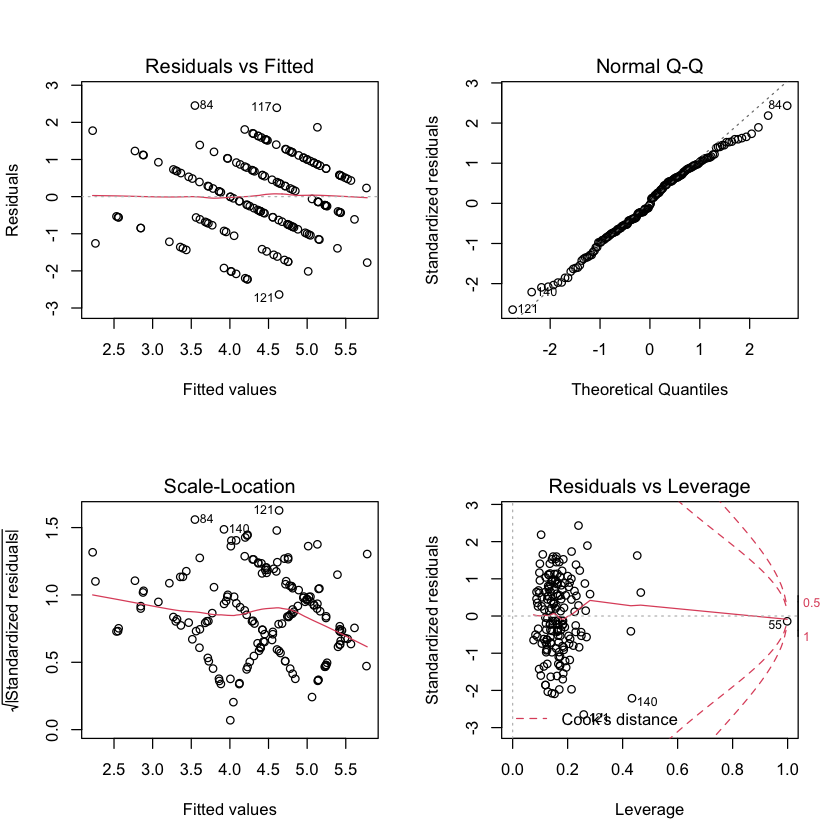

In [313]:
par(mfrow = c(2, 2))
plot(model)

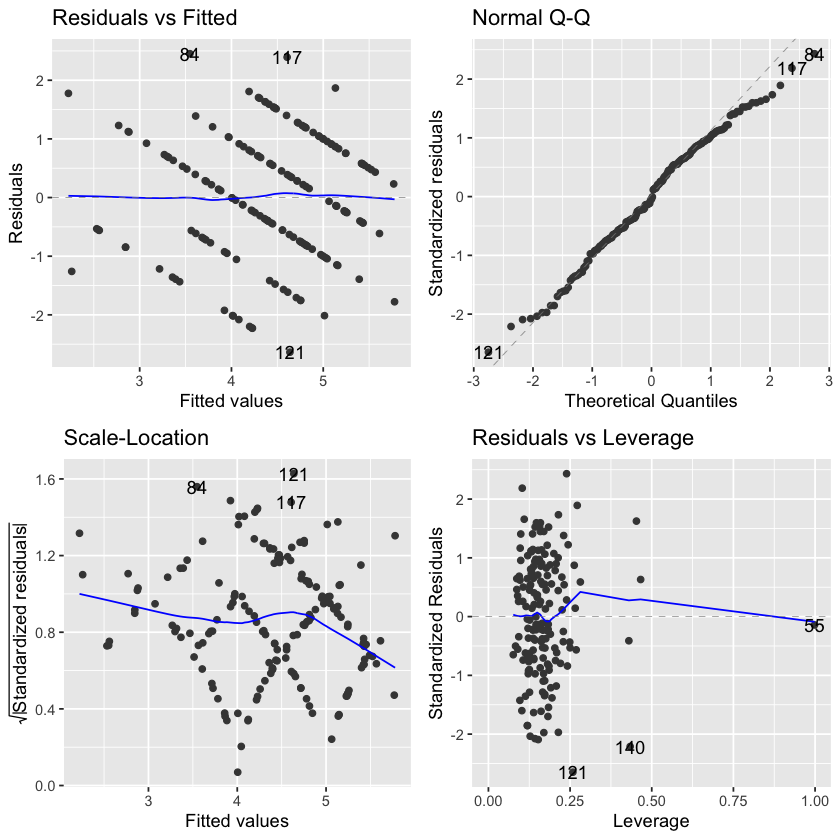

In [314]:
library(ggfortify)
autoplot(model)

- 1 Linearity of the data 

        -  Ideally, The residual plot will show no fitted pattern. That is the red lie should be approximately horizontal at zero. The presence of a pattern may indicate a problem with some aspect of the linear model. As there is no pattern we assume linear relation between variables

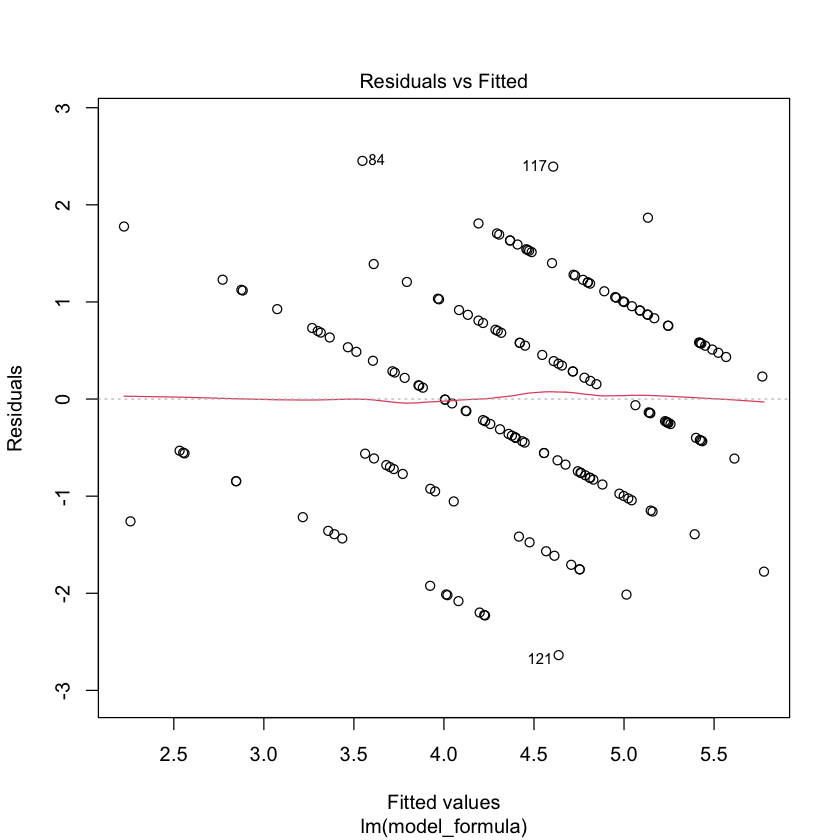

In [315]:
plot(model,1)

- 2 Homogeneity of variance


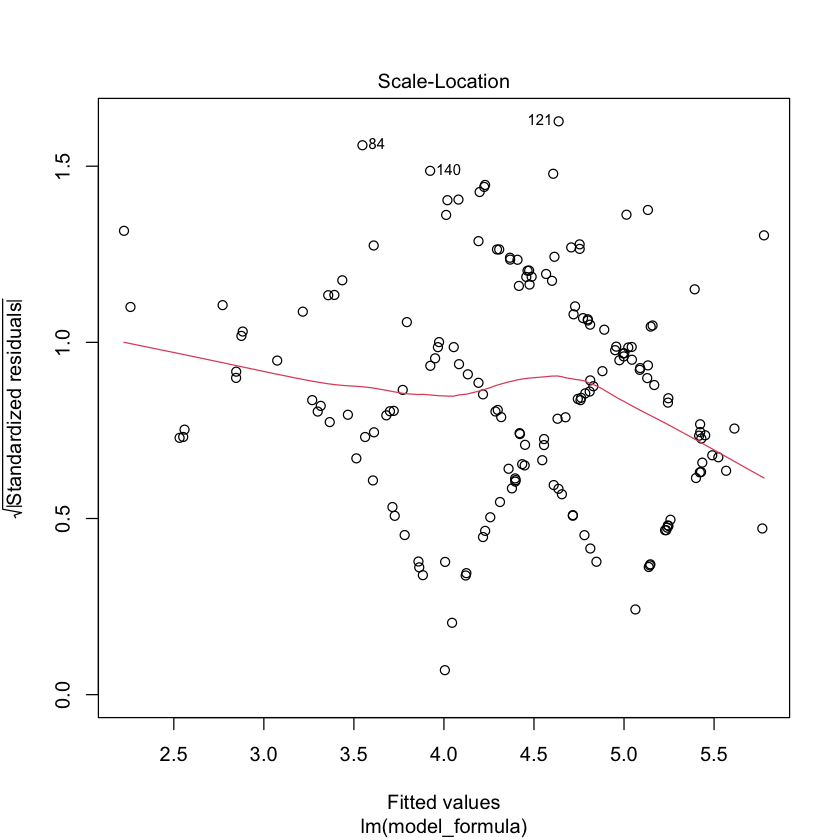

In [316]:
plot(model, 3)

- An intercept only model

In [317]:
model_1 = gls(rating ~1, data= model_data, method = "ML" ,na.action = "na.omit")
summary(model_1)

Generalized least squares fit by maximum likelihood
  Model: rating ~ 1 
  Data: model_data 
       AIC      BIC    logLik
  569.5338 575.7936 -282.7669

Coefficients:
               Value  Std.Error t-value p-value
(Intercept) 4.414201 0.09948549 44.3703       0

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.6477363 -0.3212158 -0.3212158  0.4542910  2.0053046 

Residual standard error: 1.289479 
Degrees of freedom: 169 total; 168 residual

In [318]:
formula_2 = 'rating ~.'

# age+education+gender+SFD+CC+rating+appearance+taste+healthiness+familiarity+RecipeWebUsage+HomeCook+CookingExp+EatingGoals+Depression+PhysicalActivity+SleepHours+CookingTime+BMI'

model_2 = lm(formula_2, data=model_data)

In [319]:
summary(model_2)


Call:
lm(formula = formula_2, data = model_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.63689 -0.74342 -0.00654  0.80818  2.45253 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)         -9.995e+00  3.704e+00  -2.699  0.00782 **
age                  1.954e-03  2.850e-01   0.007  0.99454   
education            6.107e-01  7.615e-01   0.802  0.42387   
gender               5.429e-02  2.050e-01   0.265  0.79152   
SFD                 -1.259e-01  3.502e-01  -0.360  0.71965   
CC                   7.112e-03  2.199e-01   0.032  0.97425   
appearance           1.751e-01  1.471e-01   1.191  0.23583   
taste               -2.122e-02  1.208e-01  -0.176  0.86082   
healthiness          4.783e-02  9.133e-02   0.524  0.60135   
familiarity          1.423e-01  9.435e-02   1.509  0.13366   
RecipeWebUsage      -1.254e-01  2.059e-01  -0.609  0.54327   
HomeCook            -3.372e-02  1.859e-01  -0.181  0.85631   
CookingExp          -4.37

## Multi level linear models

In [1]:
library(lme4)

Loading required package: Matrix



In [16]:
model <- lmer(
    rating ~ age+education+gender+SFD+CC+appearance+taste+healthiness+familiarity+RecipeWebUsage+HomeCook+CookingExp+EatingGoals+Depression+PhysicalActivity+SleepHours+CookingTime+brightness+sharpness+contrast+colourfulness+entropy+rgbContrast+sharpnessVariation+saturation+saturationVariation+naturalness+BMI + (1| CC),
    data = model_data
)

Warning message:
"Some predictor variables are on very different scales: consider rescaling"
boundary (singular) fit: see ?isSingular



In [17]:
# View summary of results
summary(model)


Correlation matrix not shown by default, as p = 29 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']
Formula: rating ~ age + education + gender + SFD + CC + appearance + taste +  
    healthiness + familiarity + RecipeWebUsage + HomeCook + CookingExp +  
    EatingGoals + Depression + PhysicalActivity + SleepHours +  
    CookingTime + brightness + sharpness + contrast + colourfulness +  
    entropy + rgbContrast + sharpnessVariation + saturation +  
    saturationVariation + naturalness + BMI + (1 | CC)
   Data: model_data

REML criterion at convergence: 526.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.28036 -0.64290 -0.00566  0.69890  2.12093 

Random effects:
 Groups   Name        Variance Std.Dev.
 CC       (Intercept) 0.000    0.000   
 Residual             1.337    1.156   
Number of obs: 169, groups:  CC, 18

Fixed effects:
                      Estimate Std. Error t value
(Intercept)         -9.995e+00  3.704e+00  -2.699
age                  1.954e-03  2.850e-01   0.007
education            6.107e-01  7.615e

In [9]:
model_data

age,education,gender,SFD,CC,appearance,taste,healthiness,familiarity,RecipeWebUsage,...,contrast,colourfulness,entropy,rgbContrast,sharpnessVariation,saturation,saturationVariation,naturalness,rating,BMI
<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,3.25,4.000000,4,5,1,4,2,...,0.089279536,0.1367041,7.010506,0.26117829,0.17366235,0.1658251,0.08785157,0.6951632,4,20.60378
1,1,0,3.75,4.333333,4,4,5,5,1,...,0.087697210,0.2700542,7.810102,0.29271031,0.45399622,0.2123419,0.21183914,0.8847718,5,17.64706
1,1,0,3.75,4.500000,4,4,3,5,2,...,0.038756710,0.2567191,7.555311,0.14603039,0.08450586,0.2753613,0.18983971,0.8895628,5,20.79673
1,1,1,3.00,2.833333,4,5,2,4,1,...,0.038756710,0.2567191,7.555311,0.14603039,0.08450586,0.2753613,0.18983971,0.8895628,5,18.51320
1,1,1,2.25,4.500000,4,5,2,4,2,...,0.038756710,0.2567191,7.555311,0.14603039,0.08450586,0.2753613,0.18983971,0.8895628,5,18.25552
1,1,1,3.50,4.166667,4,4,3,3,1,...,0.036800271,0.1804214,6.965160,0.13356357,0.07137770,0.1357490,0.14122804,0.7520743,5,32.65306
1,1,0,3.50,3.500000,5,5,3,4,2,...,0.036800271,0.1804214,6.965160,0.13356357,0.07137770,0.1357490,0.14122804,0.7520743,5,39.98657
0,1,0,4.00,5.000000,5,5,5,1,2,...,0.043833300,0.3645742,7.598009,0.18611960,0.14412257,0.3726703,0.25001177,0.9848207,6,25.90946
1,1,1,3.75,4.500000,5,4,5,5,3,...,0.043833300,0.3645742,7.598009,0.18611960,0.14412257,0.3726703,0.25001177,0.9848207,6,27.74475


## LR with Baisc Features

In [1]:
unique_basic = read.csv('./uniqe_basic_features.csv')

In [3]:
basic_f_models <- 'user_avg_ratings ~ .'
userP.fit <- lm(basic_f_models , data = unique_basic)
summary <- summary(userP.fit)
summary


Call:
lm(formula = basic_f_models, data = unique_basic)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.53250 -0.65019 -0.01297  0.59635  2.80866 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -6.3636     2.1607  -2.945 0.003635 ** 
brightness            1.8505     0.9154   2.022 0.044636 *  
sharpness            -0.8285     1.7964  -0.461 0.645198    
contrast              6.6407    19.5571   0.340 0.734573    
colourfulness         6.8036     3.9484   1.723 0.086511 .  
entropy               1.0074     0.2711   3.716 0.000267 ***
rgbContrast          -1.7031     6.6748  -0.255 0.798881    
sharpnessVariation   -0.3259     0.9754  -0.334 0.738649    
saturation           -4.0999     1.9832  -2.067 0.040075 *  
saturationVariation   0.4654     3.6738   0.127 0.899318    
naturalness           1.6494     1.0552   1.563 0.119710    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error:

## LR with Clip Features

In [23]:
clip_ratings = read.csv('./clip_data.csv')

In [28]:
clip_ratings = subset(clip_ratings, select = -c(recipes) )

ERROR: Error in eval(substitute(select), nl, parent.frame()): object 'recipes' not found


In [30]:
clip_f_models <- 'rating ~ .'
clip.fit <- aov(clip_f_models , data = clip_ratings)
clip_summary <- summary(clip.fit)
clip_summary


Call:
lm(formula = clip_f_models, data = clip_ratings)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6154 -1.0000  0.0714  1.0000  4.1667 

Coefficients: (570 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  35.87980   20.86747   1.719  0.08570 . 
Column2      10.27343   11.93543   0.861  0.38948   
Column3      11.10397   10.20096   1.089  0.27650   
Column4     -11.44197    9.85260  -1.161  0.24566   
Column5       0.57274    4.68332   0.122  0.90268   
Column6       3.00066    2.71349   1.106  0.26894   
Column7      -9.29114   10.70727  -0.868  0.38565   
Column8      -8.28717    7.91234  -1.047  0.29506   
Column9      -7.32343    3.83606  -1.909  0.05640 . 
Column10     -8.75569    7.47380  -1.172  0.24154   
Column11     -5.77403    5.28079  -1.093  0.27435   
Column12     14.02138   13.40496   1.046  0.29570   
Column13     -0.33953    1.77124  -0.192  0.84800   
Column14      4.73580    3.79811   1.247  0.21259 

In [31]:
sqrt(mean(clip.fit$residuals^2))

[1] 1.500356

## LR with VGG16

In [35]:
vgg_16_ratings = read.csv('./vgg16_ratings.csv')
vgg_16_ratings = subset(vgg_16_ratings, select = -c(recipes) )


vgg_16_f_models <- 'rating ~ .'
vgg_16.fit <- lm(vgg_16_f_models , data = vgg_16_ratings)
vgg_16_summary <- summary(vgg_16.fit)
vgg_16_summary


Call:
lm(formula = vgg_16_f_models, data = vgg_16_ratings)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6154 -1.0000  0.0714  1.0000  4.1667 

Coefficients: (3898 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  4.342e+00  1.175e+01   0.370   0.7117  
emb1        -3.928e-01  5.089e+00  -0.077   0.9385  
emb2         6.390e-02  1.622e-01   0.394   0.6937  
emb3        -6.208e-01  1.301e+01  -0.048   0.9619  
emb4        -1.819e-01  6.821e-01  -0.267   0.7898  
emb5         8.849e-01  5.152e-01   1.718   0.0860 .
emb6        -1.655e-01  2.623e+00  -0.063   0.9497  
emb7         1.932e-02  6.764e-01   0.029   0.9772  
emb8        -9.578e-01  7.982e+00  -0.120   0.9045  
emb9         3.056e-02  5.865e-01   0.052   0.9585  
emb10        2.284e-02  1.164e+00   0.020   0.9843  
emb11       -3.477e-01  7.792e+00  -0.045   0.9644  
emb12        5.533e-02  4.327e-02   1.279   0.2011  
emb13        2.100e-01  1.449e+00   0.145   0

In [36]:
sqrt(mean(vgg_16.fit$residuals^2))

[1] 1.500356

## Correlation Healhiness and attractivness